# Bootstrap Resampling of Mean
---
Does bootstrap resampling (i.e. random sampling with replacement) of a statistic better approximate the population value the more you resample?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [2]:
RAND_STATE = 1 # seed for generating random values from normal distribution
NUM_TRIALS = 3 # number of trials to run
RESAMPLE_BASE = 10 # the base number used to determine resample frequency
RESAMPLE_RANGE = 4 # exponent range to use to determine resample frequency
MIN_SAMPLE_PROP = 0.05 # minimum sampling proportion to generate a sample
SAMPLE_FACTOR = 2 # factor to multiply against MIN_SAMPLE_PROP to generate subsequent sample props
NUM_SAMPLE_SETS = 4 # number of sample sets to use
POP_SIZE = 1000000 # size of population
MU = 10 # mean of normal distribution
SIGMA = 2 # standard deviation of normal distribution

In [3]:
# population
population = norm.rvs(loc=MU, scale=SIGMA, size=POP_SIZE, random_state=RAND_STATE)
# average of population, i.e. the true mean
pop_mean = np.mean(population)
# sample proportions
samp_props = [MIN_SAMPLE_PROP*(SAMPLE_FACTOR**i) for i in range(NUM_SAMPLE_SETS)]

In [4]:
def visualize_trials(sample_proportion, num_trials, resample_sizes, bootstrap_errors):
    """
    Visualize the bootstrap error for the given sample proportion across the various trials.
    Returns None.
    """
    title = 'Evaluation of Bootstrap Resampling of Mean\nUsing a Sample Size of {}%'
    plt.figure(figsize=(12,6))
    for i in range(num_trials):
        plt.plot(
            range(len(resample_sizes)),
            [x[i] for x in bootstrap_errors],
            label='Trial {}'.format(i+1))
    plt.plot(
        range(len(resample_sizes)),
        [np.mean(x) for x in bootstrap_errors],
        label='Average of Trials',
        linestyle='dashed')
    plt.xticks(
        ticks=range(len(resample_sizes)),
        labels=['{:,}'.format(x) for x in resample_sizes])
    plt.xlabel('\nNumber of resamples')
    plt.ylabel('Bootstrap estimation error\ni.e. abs(population_mean - bootstrap_mean)\n')
    plt.title(title.format(int(sample_proportion*100)))
    plt.legend()

Population Mean (i.e. the true mean): 10.001304
Sample Proportion: 0.05
	Trial #1
		Number of Resamples: 10
			Bootstrap Mean:		10.001973
			Bootstrap Error:	0.000670
		Number of Resamples: 100
			Bootstrap Mean:		10.003697
			Bootstrap Error:	0.002394
		Number of Resamples: 1,000
			Bootstrap Mean:		10.003248
			Bootstrap Error:	0.001945
		Number of Resamples: 10,000
			Bootstrap Mean:		10.003354
			Bootstrap Error:	0.002051
	Trial #2
		Number of Resamples: 10
			Bootstrap Mean:		10.005977
			Bootstrap Error:	0.004673
		Number of Resamples: 100
			Bootstrap Mean:		10.004519
			Bootstrap Error:	0.003216
		Number of Resamples: 1,000
			Bootstrap Mean:		10.003364
			Bootstrap Error:	0.002060
		Number of Resamples: 10,000
			Bootstrap Mean:		10.003368
			Bootstrap Error:	0.002065
	Trial #3
		Number of Resamples: 10
			Bootstrap Mean:		10.003482
			Bootstrap Error:	0.002178
		Number of Resamples: 100
			Bootstrap Mean:		10.003805
			Bootstrap Error:	0.002502
		Number of Resamples: 1,000
		

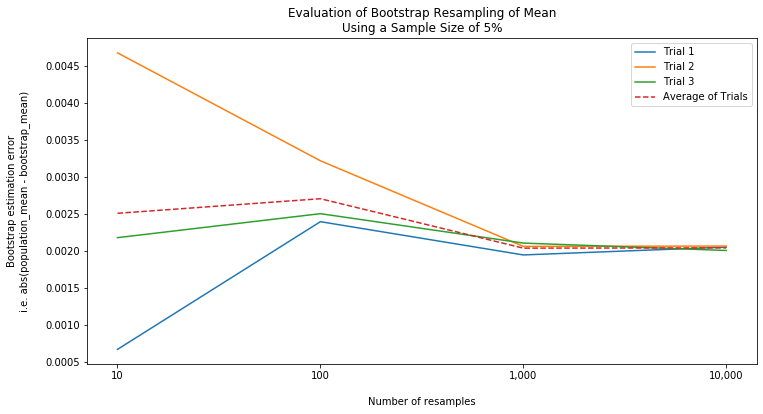

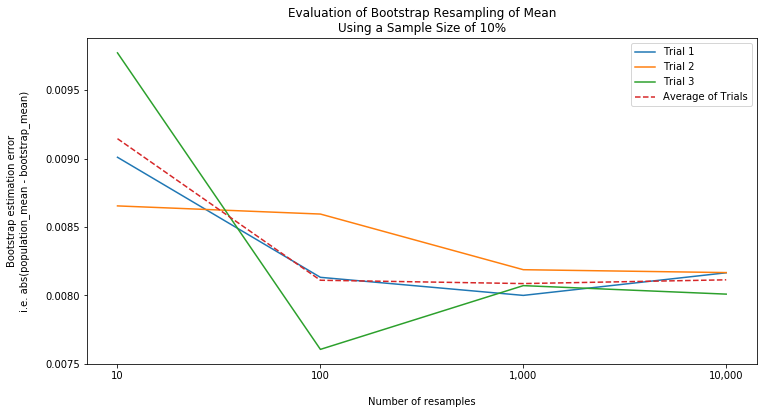

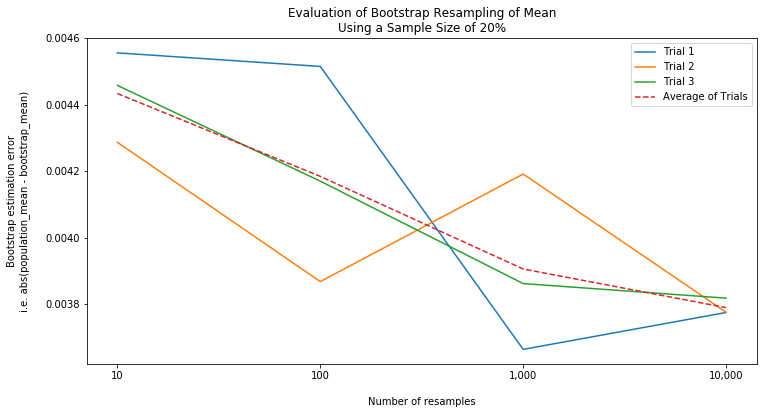

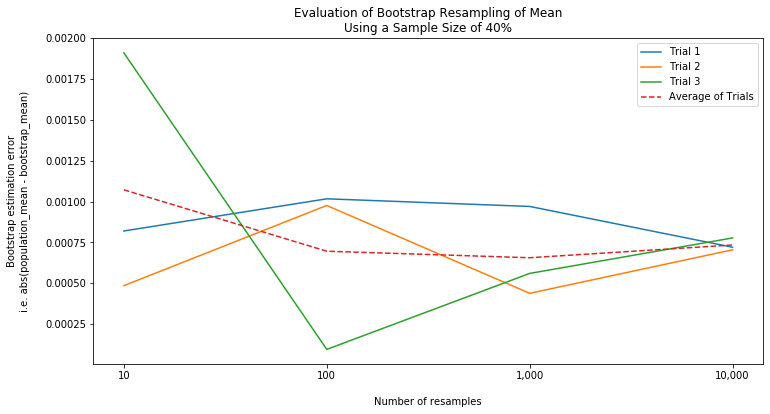

In [5]:
log = {
    'population_size': POP_SIZE,
    'mu': MU,
    'sigma': SIGMA,
    'population_mean': round(pop_mean, 6),
    'sample_proportion': {}
}
print('Population Mean (i.e. the true mean): {:.6f}'.format(pop_mean))
for samp_prop in samp_props:
    print('Sample Proportion: {:.2f}'.format(samp_prop))
    log['sample_proportion'][samp_prop] = []
    # a randomly chosen sample from the population
    sample = np.random.choice(population, size=int(samp_prop * POP_SIZE), replace=False)
    resample_sizes = []
    bootstrap_errors = [[] for _ in range(RESAMPLE_RANGE)]
    for trial in range(NUM_TRIALS):
        print('\tTrial #{:,}'.format(trial+1))
        trial_log = {'num_resamples': {}}
        for index, exponent in enumerate(range(1, RESAMPLE_RANGE+1)):
            num_resamples = RESAMPLE_BASE**exponent
            bootstrap_mean_samples = []
            for _ in range(num_resamples):
                # sample WITH replacement from the sample
                samples = np.random.choice(sample, size=len(sample), replace=True)
                bootstrap_mean_samples.append(np.mean(samples))
            # average of bootstrap resamples
            bootstrap_mean = np.mean(bootstrap_mean_samples)
            bootstrap_error = abs(pop_mean - bootstrap_mean)
            if trial == 0:
                resample_sizes.append(num_resamples)
            bootstrap_errors[index].append(bootstrap_error)
            print('\t\tNumber of Resamples: {:,}'.format(num_resamples))
            print('\t\t\tBootstrap Mean:\t\t{:.6f}'.format(bootstrap_mean))
            print('\t\t\tBootstrap Error:\t{:.6f}'.format(bootstrap_error))
            trial_log['num_resamples'][num_resamples] = {
                'bootstrap_mean': round(bootstrap_mean, 6),
                'bootstrap_error': round(bootstrap_error, 6)
            }
        log['sample_proportion'][samp_prop].append(trial_log)
    visualize_trials(
        sample_proportion=samp_prop,
        num_trials=NUM_TRIALS,
        resample_sizes=resample_sizes,
        bootstrap_errors=bootstrap_errors)
plt.show()

# Conclusion
No, the population value of a statistic (e.g. mean) is not reliably better approximated the more you resample using the bootstrap resampling technique.

The sample used for bootstrap resampling determines how close the approximation will get to the population value and the bootstrap statistic does not better approximate the population statistic the more you resample. There is a bootstrap estimation error that is approximated the more you resample, however that error does not reliably decrease the more that one resamples.